# fixed random seed

In [1]:
import pandas as pd
import numpy as np
import random
import os

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed_everything(42) #seed 고정

# 데이터 불러오기 및 확인

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


display(train.head(3))
display(test.head(3)) 


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median


# 학습 및 추론 데이터 설정
모델에게 입력할 학습 데이터와 추론 데이터를 만들기

In [3]:
train_x= train.drop(columns=['ID', 'Income'])
train_y = train['Income']

test_x= test.drop(columns=['ID'])


# 범주형 변수 수치화
labelencoder를 통해 범주형 변수 수치화를 진행하기

In [4]:
from sklearn.preprocessing import LabelEncoder

encoding_target = list(train_x.dtypes[train_x.dtypes == 'object'].index)

for i in encoding_target:
    le = LabelEncoder()
    
    #train과 test 데이터셋에서 해당 열의 모든 값을 문자열로 변환
    train_x[i]=train_x[i].astype(str)
    test_x[i]=test_x[i].astype(str)
    
    le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    #test 데이터의 새로운 카테고리에 대해 le.classes_ 배열에 추가 
    for case in np.unique(test_x[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)
            
    test_x[i] = le.transform(test_x[i])
    
    

# 모델 선정 및 학습
소득 예측을 위한 ai모델은 정하고 학습시키기

In [5]:
from sklearn.tree import DecisionTreeRegressor

model= DecisionTreeRegressor()
model.fit(train_x, train_y)

DecisionTreeRegressor()

# 예측 수행
predict()를 통해 모델이 예측한 소득을 구해보기

In [6]:
preds = model.predict(test_x)

# 제출양식에 예측결과 입력
모델이 예측한 소득을 제출양식에 입력하기

In [7]:
submission = pd.read_csv("sample_submission.csv")
submission['Income']=preds
submission

,ID,Income
0,TEST_0000,0.0
1,TEST_0001,0.0
2,TEST_0002,500.0
3,TEST_0003,515.0
4,TEST_0004,0.0
...,...,...
9995,TEST_9995,1300.0
9996,TEST_9996,700.0
9997,TEST_9997,425.0
9998,TEST_9998,0.0


# 예측결과 저장
값이 기입된 제출물을 저장해 보기

In [8]:
submission.to_csv('baseline_submission.csv',index = False)

In [9]:
train

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,TRAIN_19995,33,M,High graduate,Children or Armed Forces,52,Manufacturing (Durable),Handlers/Cleaners,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,1300
19996,TRAIN_19996,20,F,College,Full-Time,12,Education,Admin Support (include Clerical),White,Mexican-American,...,Native,US,Mexico,Mexico,Nonfiler,0,0,0,Under Median,850
19997,TRAIN_19997,22,M,College,Children or Armed Forces,52,Transportation,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Unknown,999
19998,TRAIN_19998,76,F,High graduate,Not Working,0,Not in universe or children,Unknown,White,All other,...,Native,US,Scotland,England,Single,0,0,0,Under Median,0


In [10]:
train['Race'].value_counts()

Race
White                           16845
Black                            2122
Asian/Pacific                     511
Other                             296
Native American/Aleut/Eskimo      226
Name: count, dtype: int64

# ----

In [11]:
## 고유값을 확인

for i in train.columns:
    print(i, len(train[i].unique()))
    print(train[i].unique())
    print()
    

ID 20000
['TRAIN_00000' 'TRAIN_00001' 'TRAIN_00002' ... 'TRAIN_19997' 'TRAIN_19998'
 'TRAIN_19999']

Age 91
[63 37 58 44 55 67 64 24 53 56 75 34 40 21 10 48 36 29 28 16 31 76 39 49
 60 15 59 23 35 57 17 18  7 52 41 42 30 43 22 61 46 19 27 38 50 26  5 81
 47 25 12 66 82 70 11 51 13 45 33 54 14  9 71 80 32  1  8 20  6  2 73 62
  3 83 72  0 69 65  4 90 85 74 68 84 77 79 78 86 87 88 89]

Gender 2
['M' 'F']

Education_Status 17
['Middle (7-8)' 'Associates degree (Vocational)' 'High graduate'
 'Masters degree' 'Bachelors degree' 'High Freshman' 'Elementary (1-4)'
 'College' 'Children' 'High Sophomore' 'Associates degree (Academic)'
 'High Junior' 'Elementary (5-6)' 'Doctorate degree' 'Professional degree'
 'High Senior' 'Kindergarten']

Employment_Status 8
['Full-Time' 'Children or Armed Forces' 'Not Working' 'Seeking Full-Time'
 'Choice Part-Time' 'Part-Time (Usually Part-Time)'
 'Part-Time (Usually Full-Time)' 'Seeking Part-Time']

Working_Week (Yearly) 53
[ 4 52 50  0  5 30 40 20 14  6 12

## 인종 수

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

pie차트로 표현

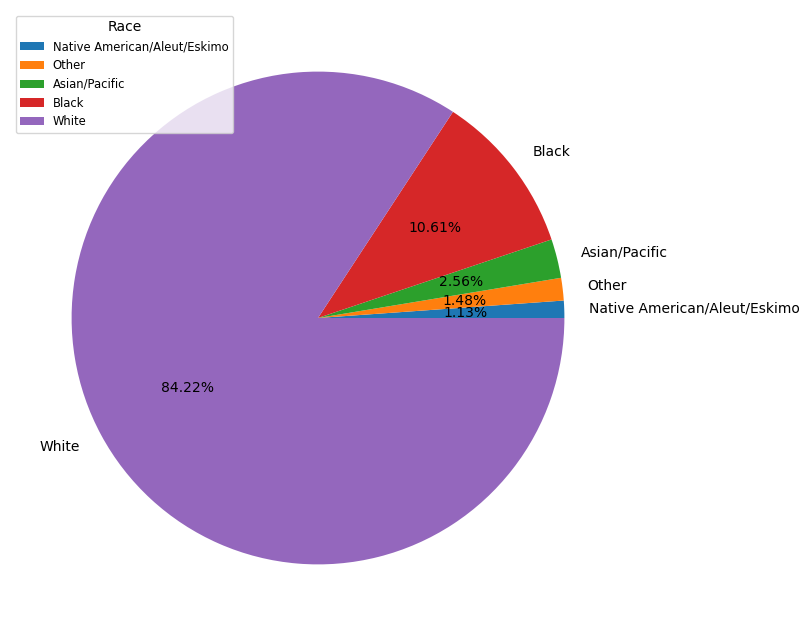

In [13]:
# Race 값의 빈도수 계산 및 정렬
race_counts = train['Race'].value_counts().sort_values()

# 파이 차트 그리기
plt.figure(figsize=(8, 8))  # 차트의 크기 조정
plt.pie(race_counts, labels=race_counts.index, autopct='%1.2f%%')

# 범례 추가하기
plt.legend(title='Race', loc='best', fontsize='small')  # 범례의 제목, 위치 및 글씨 크기 설정

plt.show()

백인이 가장 많음  -> 인종과 소득의 상관관계를 계산해보기

<Axes: xlabel='Race', ylabel='count'>

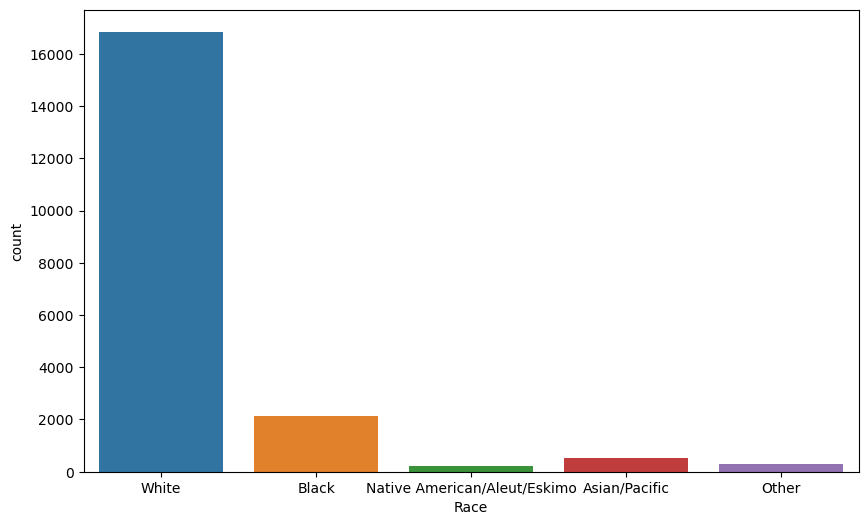

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(x='Race', data=train)

<Axes: >

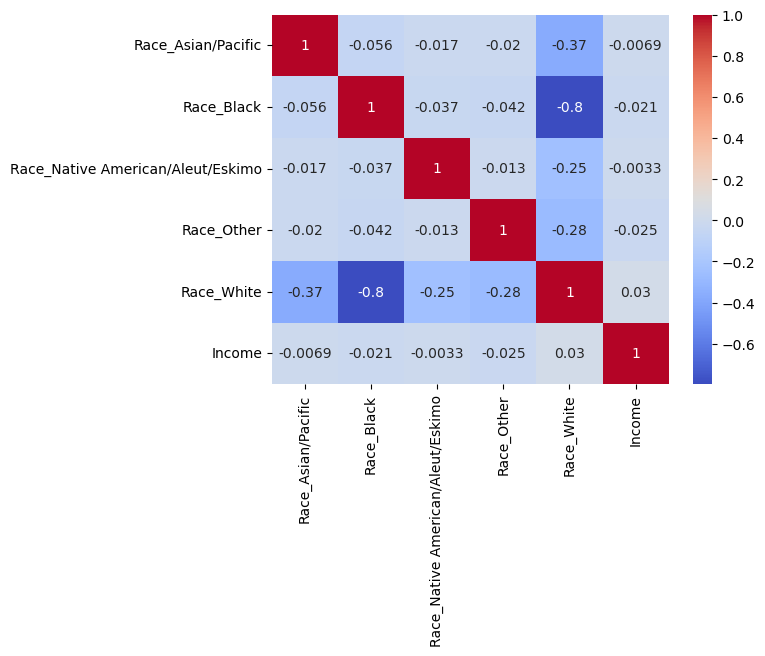

In [24]:
race_cor = train[['Race_Asian/Pacific', 'Race_Black', 'Race_Native American/Aleut/Eskimo',
       'Race_Other', 'Race_White','Income']]

race_corr = race_cor.corr()

sns.heatmap(race_corr, annot=True, cmap='coolwarm')



In [19]:
train.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

In [20]:
train = pd.get_dummies(train, columns =['Race'])
train

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Hispanic_Origin,Martial_Status,...,Gains,Losses,Dividends,Income_Status,Income,Race_Asian/Pacific,Race_Black,Race_Native American/Aleut/Eskimo,Race_Other,Race_White
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,All other,Married,...,0,0,0,Unknown,425,False,False,False,False,True
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,All other,Separated,...,0,0,0,Under Median,0,False,False,False,False,True
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),All other,Married,...,3411,0,0,Under Median,860,False,True,False,False,False
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,All other,Divorced,...,0,0,0,Under Median,850,False,False,False,False,True
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,All other,Divorced,...,0,0,0,Unknown,570,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,TRAIN_19995,33,M,High graduate,Children or Armed Forces,52,Manufacturing (Durable),Handlers/Cleaners,All other,Single,...,0,0,0,Under Median,1300,False,False,False,False,True
19996,TRAIN_19996,20,F,College,Full-Time,12,Education,Admin Support (include Clerical),Mexican-American,Single,...,0,0,0,Under Median,850,False,False,False,False,True
19997,TRAIN_19997,22,M,College,Children or Armed Forces,52,Transportation,Technicians & Support,All other,Single,...,0,0,0,Unknown,999,False,False,False,False,True
19998,TRAIN_19998,76,F,High graduate,Not Working,0,Not in universe or children,Unknown,All other,Widowed,...,0,0,0,Under Median,0,False,False,False,False,True


pointplot으로 생성

In [23]:
count_data = train['Race'].value_counts().reset_index()
count_data.columns = ['Race', 'count']

plt.figure(figsize=(10,8))

sns.pointplot(x='Race', y='count',data=count_data)

KeyError: 'Race'

백인이 가장 많음

In [ ]:
train.info()

In [ ]:


f,ax = plt.subplots(2,3, figsize=(20,15))

sns.boxplot(train['Age'], ax=ax[0,0])
ax[0,0].set_title('Age outlier')
#############################################
sns.boxplot(train['Working_Week (Yearly)'], ax=ax[0,1])
ax[0,1].set_title('Working_Week (Yearly) outlier')
#############################################
sns.boxplot(train['Gains'], ax=ax[0,2])
ax[0,2].set_title('gains outlier')
#############################################
sns.boxplot(train['Losses'], ax=ax[1,0])
ax[1,0].set_title('Losses outlier')
#############################################
sns.boxplot(train['Dividends'], ax=ax[1,1])
ax[1,1].set_title('Dividends outlier')
#############################################
sns.boxplot(train['Income'], ax=ax[1,2])
ax[1,2].set_title('Income outlier')

## 성별과 소득

In [ ]:
train[['Age','Income']]

In [ ]:
# matplotlib를 사용한 산점도
plt.scatter(data=train, x='Age', y='Income')
plt.show()

In [ ]:
age_20un=train[train['Age']<20]
age_20un

In [ ]:
age_20un[['Age','Income']]
plt.scatter(data=age_20un, x='Age',y='Income')
plt.show()

In [ ]:
train['Age'].hist()

In [ ]:
# 그룹화를 위한 매핑 정의
group_mapping = {
    'Children': 'Pre-High School',
    'Kindergarten': 'Pre-High School',
    'Elementary (1-4)': 'Pre-High School',
    'Elementary (5-6)': 'Pre-High School',
    'Middle (7-8)': 'Pre-High School',
    'High Freshman': 'High School',
    'High Sophomore': 'High School',
    'High Junior': 'High School',
    'High Senior': 'High School',
    'High graduate': 'High School Graduate',
    'College': 'Post-High School',
    'Associates degree (Vocational)': 'Post-High School',
    'Associates degree (Academic)': 'Post-High School',
    'Bachelors degree': 'Undergraduate Degree',
    'Masters degree': 'Graduate Degree',
    'Professional degree': 'Graduate Degree',
    'Doctorate degree': 'Graduate Degree'
}

# 매핑 적용 및 그룹별로 값 합치기
train['G_Education_Status'] = train['Education_Status'].map(group_mapping)
train['G_Education_Status'].value_counts()
# d_train = train.groupby('G_Education_Status')['Counts'].sum().reset_index()

# d_train

학력 수준을 비슷한 수준끼리 묶어 범주화를 진행했음 

In [ ]:
# 매핑을 위한 사전 정의
grade_mapping = {'Pre-High School':1, 'High School':2,
                'High School Graduate':3,'High School Graduate':4,
                'Post-High School':5, 'Undergraduate Degree':6,
                'Graduate Degree':6}


train['G_Education_Status'] = train['G_Education_Status'].map(grade_mapping)
train

In [ ]:
train